In [10]:
import ROOT
import array
from IPython.display import Image as Plot
ROOT.gROOT.SetBatch(1)

def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

g_xres = 1366
g_yres = 768
        
infile = open("test_340_MeV_mupi.hepevt")
infile.readline()
t = 0
nDaughter = 0
counter = 1
header = True
event = array.array("I",[])
statusCode = array.array("I",[])
pdgCode = array.array("I",[])
firstMother = array.array("I",[])
secondMother = array.array("I",[])
firstDaughter = array.array("I",[])
secondDaughter = array.array("I",[])
pXPart = array.array("f",[])
pYPart = array.array("f",[])
pZPart = array.array("f",[])
ePart = array.array("f",[])
mPart = array.array("f",[])
xStartPart = array.array("f",[])
yStartPart = array.array("f",[])
zStartPart = array.array("f",[])
tStartPart = array.array("f",[])

for line in infile:
    #if header:
    x = line.split()
    header = True if len(x)==2 else False
        
    if header==True:
        headEvent = int(x[0])
        nDaughter = int(x[1])
    else:
        x = line.split()
        event.append(headEvent)
        statusCode.append(int(x[0]))
        pdgCode.append(int(x[1]))
        firstMother.append(int(x[2]))
        secondMother.append(int(x[3]))
        firstDaughter.append(int(x[4]))
        secondDaughter.append(int(x[5]))
        pXPart.append(float(x[6]))
        pYPart.append(float(x[7]))
        pZPart.append(float(x[8]))
        ePart.append(float(x[9]))
        mPart.append(float(x[10]))
        xStartPart.append(float(x[11]))
        yStartPart.append(float(x[12]))
        zStartPart.append(float(x[13]))
        tStartPart.append(float(x[14]))
        
        counter = counter + 1
        t = t+1
        
    if counter == nDaughter:
        header = True
        counter = 1
        nDaughter = 0
    else:
        header = False  

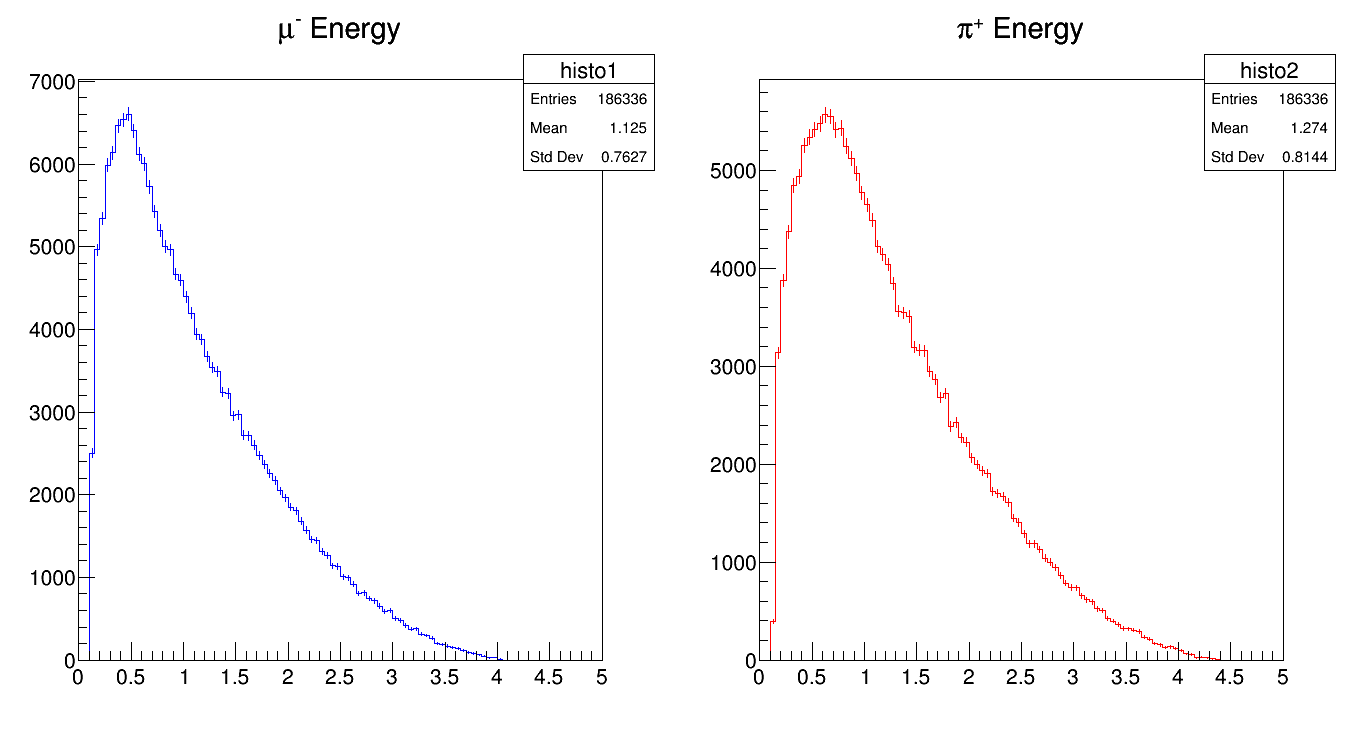

In [11]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1F("histo1","#mu^{-} Energy",100,0,5)
h2 = ROOT.TH1F("histo2","#pi^{+} Energy",100,0,5)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

for i in range(0,t):
    if pdgCode[i]==13:
        h1.Fill(ePart[i])
    if pdgCode[i]==211:
        h2.Fill(ePart[i])

c1.Divide(2,1)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")

c1.SaveAs("histo1.png")
destruct(c1)
destruct(h1)
destruct(h2)
Plot("histo1.png")

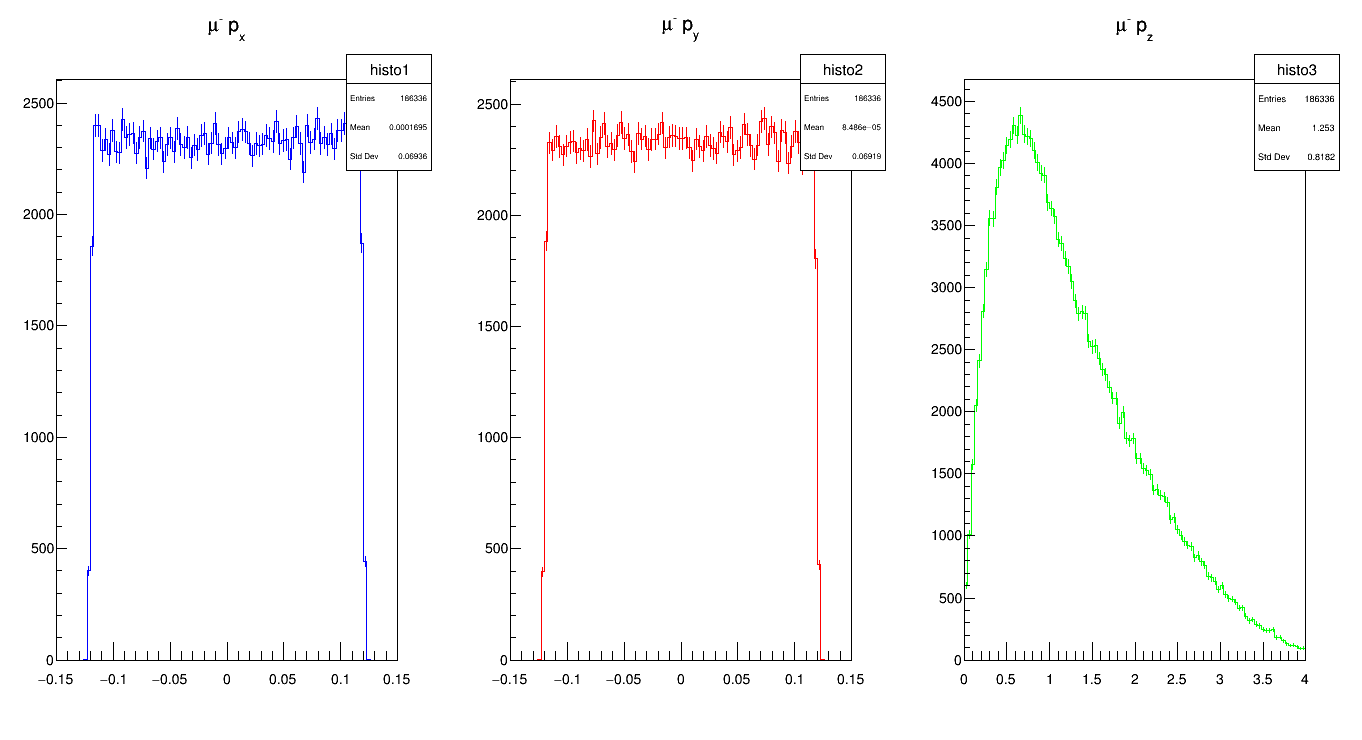

In [12]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1F("histo1","#mu^{-} p_{x}",100,-0.15,0.15)
h2 = ROOT.TH1F("histo2","#mu^{-} p_{y}",100,-0.15,0.15)
h3 = ROOT.TH1F("histo3","#mu^{-} p_{z}",100,0,4)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)

for i in range(0,t):
    if pdgCode[i]==13:
        h1.Fill(pXPart[i])
        h2.Fill(pYPart[i])
        h3.Fill(pZPart[i])

c1.Divide(3,1)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")

c1.SaveAs("histo2.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
Plot("histo2.png")

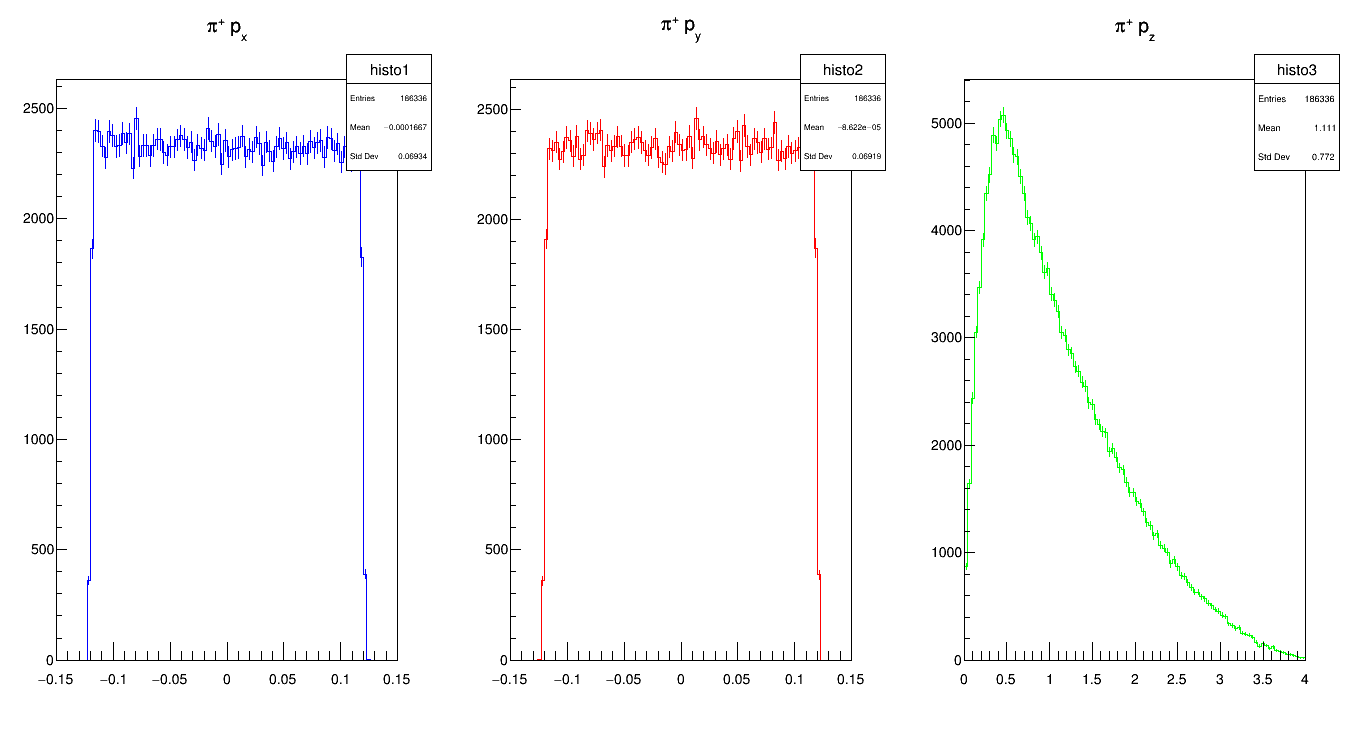

In [13]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1F("histo1","#pi^{+} p_{x}",100,-0.15,0.15)
h2 = ROOT.TH1F("histo2","#pi^{+} p_{y}",100,-0.15,0.15)
h3 = ROOT.TH1F("histo3","#pi^{+} p_{z}",100,0,4)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)

for i in range(0,t):
    if pdgCode[i]==211:
        h1.Fill(pXPart[i])
        h2.Fill(pYPart[i])
        h3.Fill(pZPart[i])

c1.Divide(3,1)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")

c1.SaveAs("histo3.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
Plot("histo3.png")